In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Cancer.csv')

##EDA

In [ ]:
n_individuos = len(data)
print("Número de individuos:", n_individuos)

Número de individuos: 569


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Observamos que la columna 32 tiene todo nulos. Por lo que la eliminamos. Además, elminimamos la columna de ID porque no nos aporta información.
El resto de variables no tienen nulos por lo que no tendremos que hacer técnicas de imputación de valores faltantes.

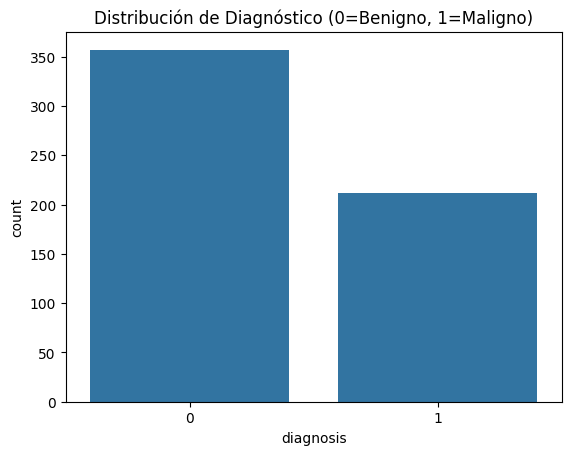

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

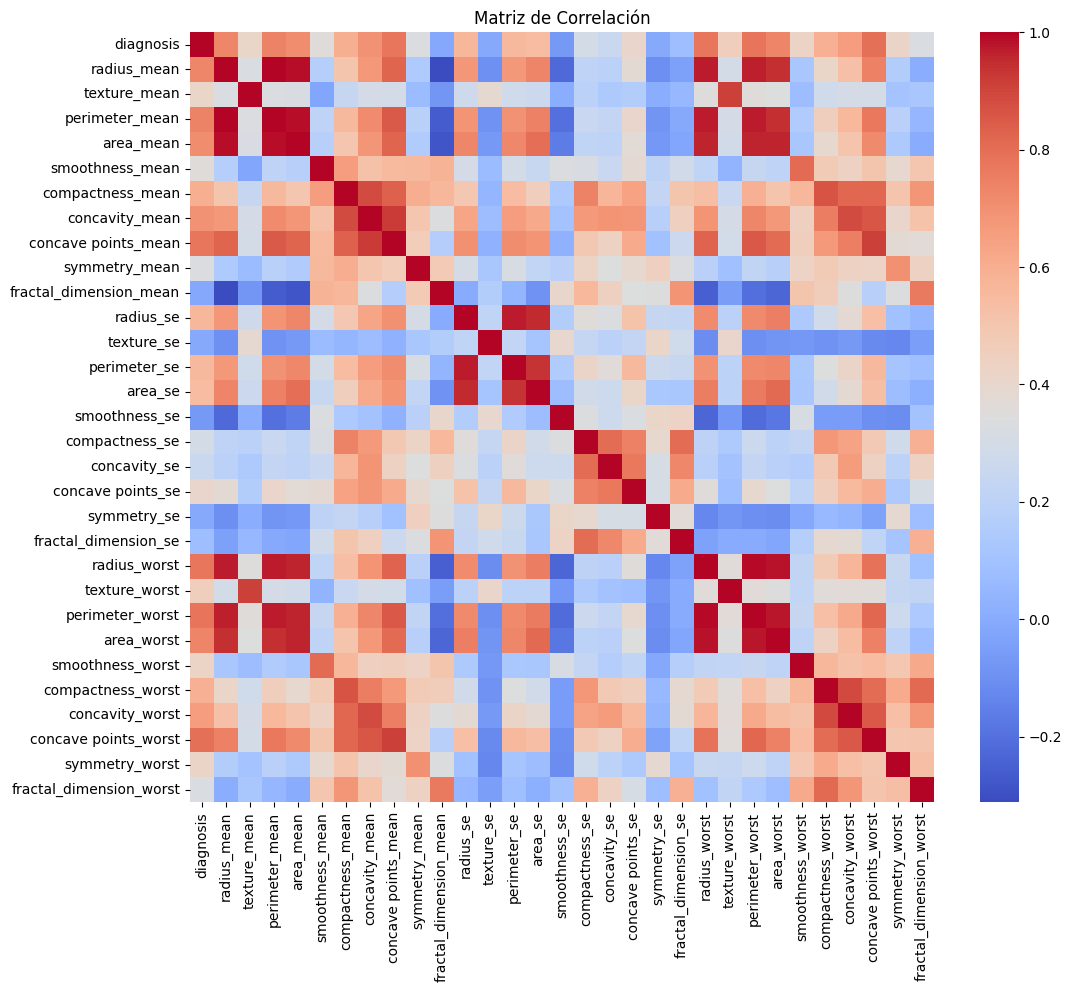

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# 1. Preprocesamiento
# Eliminar columnas irrelevantes
if 'Unnamed: 32' in data.columns:
    data.drop(columns=['Unnamed: 32'], inplace=True)
if 'id' in data.columns:
    data.drop(columns=['id'], inplace=True)

# Convertir la columna 'diagnosis' en binaria (M -> 1, B -> 0) para poder realizar regresión logística
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Revisar valores nulos
data.isnull().sum()

# 2. Análisis exploratorio (EDA)
# a) Distribución de la variable objetivo
sns.countplot(x='diagnosis', data=data)
plt.title('Distribución de Diagnóstico (0=Benigno, 1=Maligno)')
plt.show()

# b) Estadísticas descriptivas
descriptive_stats = data.describe()
print(descriptive_stats)

# c) Matriz de correlación
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación')
plt.show()



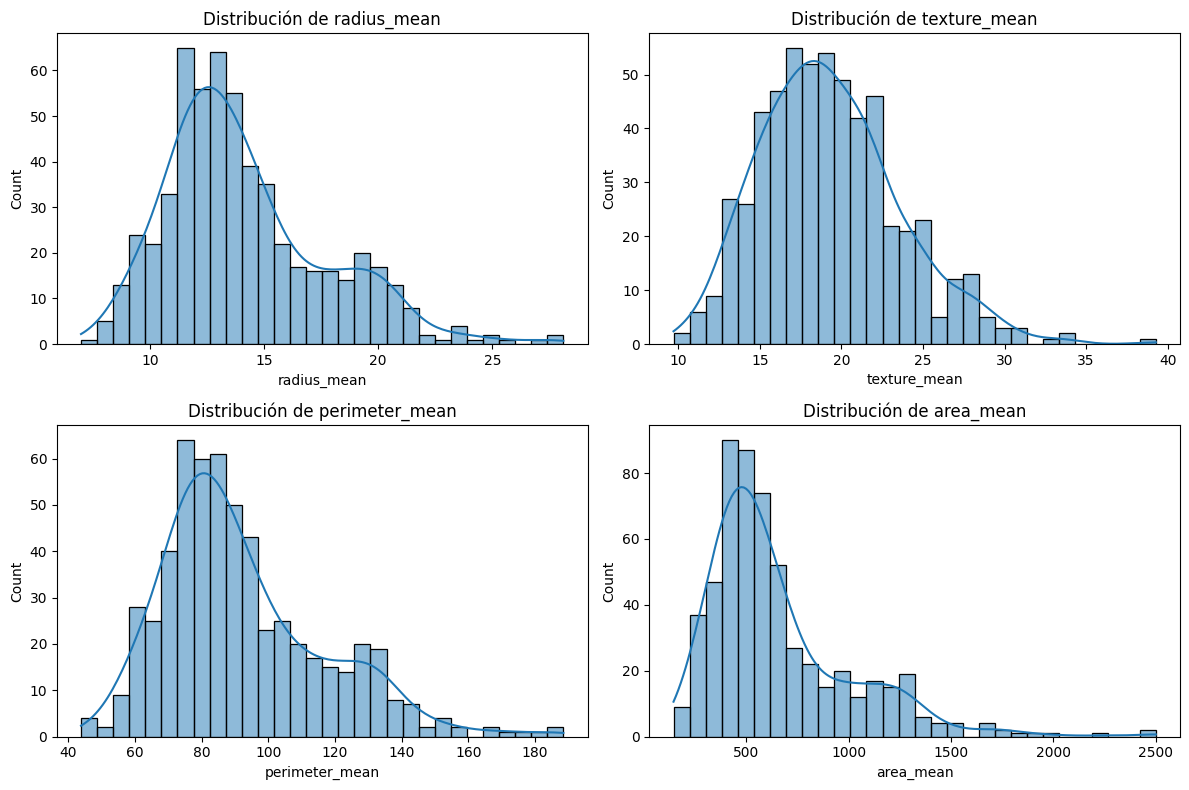

In [ ]:
# d) Distribuciones de características clave
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()
plt.show()

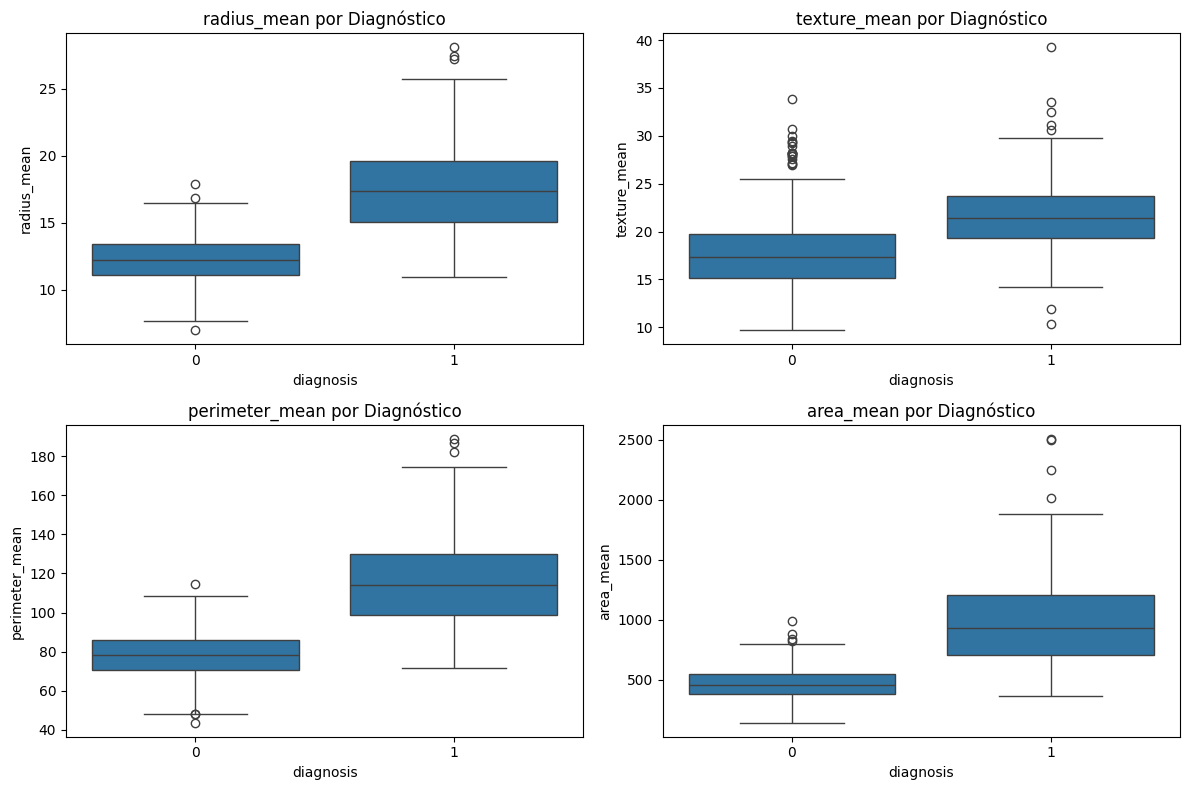

In [ ]:
# e) Relación entre características y diagnóstico
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'{feature} por Diagnóstico')
plt.tight_layout()
plt.show()

Dejamos las variables como están puesto que no hay muchos atípicos y estos no parecen provocar ningún problema en la distribución de las variables.

##Componentes Principales

###**PCA** (Reducción lineal de los datos)

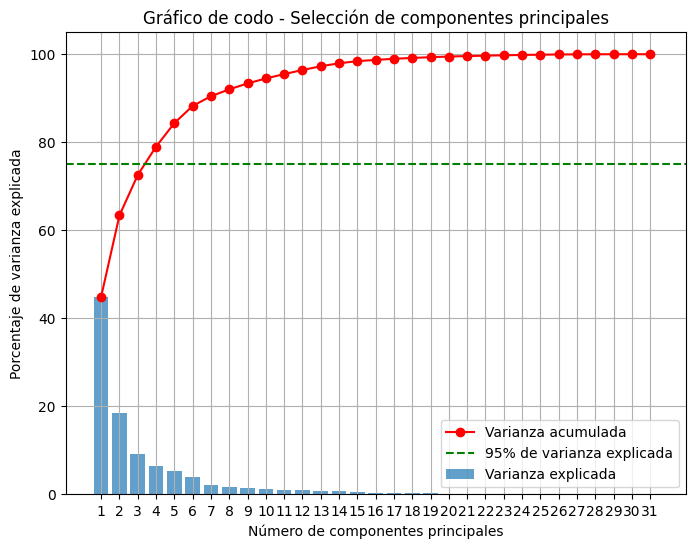


Varianza explicada por los 3 primeros componentes: 72.55%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Ajustar el PCA a los datos escalados
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Obtener varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100  # En porcentaje
varianza_acumulada = np.cumsum(varianza_explicada)  # Varianza acumulada

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, label="Varianza explicada")
plt.plot(range(1, len(varianza_explicada) + 1), varianza_acumulada, marker="o", color="r", label="Varianza acumulada")
plt.xticks(range(1, len(varianza_explicada) + 1))
plt.xlabel("Número de componentes principales")
plt.ylabel("Porcentaje de varianza explicada")
plt.title("Gráfico de codo - Selección de componentes principales")
plt.axhline(y=75, color="g", linestyle="--", label="95% de varianza explicada")
plt.legend()
plt.grid()
plt.show()

# Justificación para 2 componentes
print("\nVarianza explicada por los 3 primeros componentes: {:.2f}%".format(varianza_acumulada[2]))


Escogemos 3 componentes principales ya que superan el 70% de la variabilidad explicada. Además, coger un número bajo favorece la interpretación. Sin embaargo, si este es muy bajo, no recogería suficiente información de los datos y estaríamos perdiendo demasiada información.

In [ ]:
# PCA convencional
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Comparar resultados
print("Resultados del PCA (primeras 5 observaciones):")
print(pca_result[:5])


Resultados del PCA (primeras 5 observaciones):
[[ 9.22577011  2.11619563 -0.94810915]
 [ 2.6558016  -3.78477586 -0.50282496]
 [ 5.89249212 -1.00557896 -0.48714898]
 [ 7.13540075 10.31871637 -3.33950107]
 [ 4.12942271 -1.90557914  1.45400012]]


In [ ]:

# Ajustar el PCA a los datos escalados
pca = PCA()  # Si quieres analizar todos los componentes
pca_result = pca.fit_transform(data_scaled)

# Obtener autovalores (varianza explicada) y autovectores (direcciones principales)
autovalores = pca.explained_variance_
autovectores = pca.components_

# Mostrar resultados
print("Autovalores (Varianza explicada):")
print(autovalores)

df_autovectores = pd.DataFrame(autovectores, columns=data.columns)
print("\nAutovectores (direcciones principales):")
print(df_autovectores.head(3))

# Para centrarnos en los dos primeros componentes
print("\nInterpretación del PCA:")
print("Varianza explicada por el primer componente: {:.2f}%".format(pca.explained_variance_ratio_[0] * 100))
print("Varianza explicada por el segundo componente: {:.2f}%".format(pca.explained_variance_ratio_[1] * 100))
print("Varianza explicada por el segundo componente: {:.2f}%".format(pca.explained_variance_ratio_[2] * 100))


Autovalores (Varianza explicada):
[1.39422741e+01 5.73643378e+00 2.85186154e+00 2.00188139e+00
 1.66199949e+00 1.20963379e+00 6.85924646e-01 4.85709057e-01
 4.17628800e-01 3.51511408e-01 3.05392113e-01 2.91498144e-01
 2.61469947e-01 2.12649275e-01 1.48837762e-01 8.83177777e-02
 8.00007715e-02 5.91392660e-02 5.15525101e-02 4.83008359e-02
 3.07603392e-02 2.95786345e-02 2.73928094e-02 2.43263453e-02
 1.75831161e-02 1.55005796e-02 8.07032705e-03 6.88182652e-03
 1.59126388e-03 7.42984526e-04 1.32868212e-04]

Autovectores (direcciones principales):
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   0.216917     0.216399      0.103599        0.224548   0.217965   
1  -0.077610    -0.226545     -0.058262       -0.207630  -0.223224   
2  -0.103826     0.002527      0.054751        0.001854   0.040151   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.137645          0.231504        0.251222             0.255266   
1         0.1887

In [ ]:
# DataFrame de autovectores
df_autovectores = pd.DataFrame(autovectores, columns=data.columns)

# Obtener las 3 columnas con los mayores valores en valor absoluto y sus valores originales para cada fila
top3_columnas_y_valores_abs = df_autovectores.apply(
    lambda fila: [(col, fila[col]) for col in fila.abs().nlargest(3).index], axis=1
)

# Mostrar resultados
print("\nTop 3 columnas con mayores valores (en valor absoluto) y sus valores originales por fila:")
for i, info in enumerate(top3_columnas_y_valores_abs[:3], start=1):  # Mostrar solo las 3 primeras filas
    print(f"Fila {i}: {info}")





Top 3 columnas con mayores valores (en valor absoluto) y sus valores originales por fila:
Fila 1: [('concave points_mean', 0.25526639876020174), ('concavity_mean', 0.2512217874235078), ('concave points_worst', 0.24628843608626746)]
Fila 2: [('fractal_dimension_mean', 0.36761955522487244), ('fractal_dimension_se', 0.2843317269956249), ('fractal_dimension_worst', 0.27644911805700867)]
Fila 3: [('texture_se', 0.36159518057288437), ('smoothness_se', 0.3001748312642047), ('symmetry_se', 0.28280285705605485)]


A partir de los resultados obtenidos, se puede interpretar cada componente principal basándonos en las variables más importantes (las que tienen los valores más altos en los autovectores). Vamos a analizar cada componente:

**Componente principal 1**:

Interpretación: Este componente principal está altamente influenciado por variables relacionadas con la forma y los contornos de las células cancerígenas, particularmente las características de concavidad (huecos en los bordes de las células).

'Concave points' y 'concavity' son características geométricas que suelen estar asociadas a la irregularidad de los bordes celulares.
En el diagnóstico de cáncer, estas características son importantes porque los bordes irregulares y profundos en las células son indicadores de malignidad.

**Conclusión: El primer componente parece estar capturando las características que miden la irregularidad estructural y los contornos de las células, lo que es crítico para diferenciar entre tumores malignos y benignos.**


**Componente principal 2**:

Interpretación: El segundo componente está dominado por la fractalidad de las células. La fractalidad mide la complejidad de los bordes y cómo estos cambian a distintas escalas.

Los valores altos en la fractalidad suelen estar asociados a bordes complejos e irregulares, características típicas de tumores malignos.

Esto sugiere que el segundo componente captura patrones de complejidad geométrica global de los bordes celulares, que también es una señal clave en el diagnóstico.

**Conclusión: Representa la complejidad geométrica global de los bordes celulares (fractalidad), otra señal clave de malignidad.**

**Componente principal 3**:

Interpretación: Este componente está relacionado con la textura, la suavidad y la simetría de las células.

'Texture' mide la variabilidad en los niveles de gris dentro de las células, una propiedad que cambia entre células benignas (más homogéneas) y malignas (más heterogéneas).

'Smoothness' está relacionada con la uniformidad de los bordes. Menor suavidad puede reflejar irregularidades, típicas de células malignas.

'Symmetry' mide el grado de equilibrio en la forma de las células. Tumores benignos suelen tener formas más simétricas, mientras que los malignos tienden a ser más asimétricos.

**Conclusión: El tercer componente parece estar evaluando características de textura interna y morfología global de las células, lo que ayuda a complementar las observaciones de los dos primeros componentes.**

##Reducción de dimensiones no lineal (Autoencoder)

Paso 1: Crear un Autoencoder
Un autoencoder es una red neuronal que tiene dos partes principales:

Codificador (encoder): Reduce la dimensión de los datos a un espacio latente.
Decodificador (decoder): Reconstruye los datos desde el espacio latente.
El espacio latente en el medio de la red actúa como las componentes principales en PCA.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Crear datos de ejemplo (o sustituir por tu matriz de datos)
np.random.seed(1000)


# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Parámetros del autoencoder
input_dim = data_scaled.shape[1]  # Número de variables originales
encoding_dim = 3  #Para poder comparar con PCA  de 2 dimensiones

# Definir las capas del autoencoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)

# Construir el modelo autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=500, batch_size=16, shuffle=True, validation_split=0.2)

# Extraer la parte del codificador para obtener las componentes latentes
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Generar las representaciones latentes
latent_space = encoder_model.predict(data_scaled)

# Mostrar las dimensiones reducidas
print("Representación en el espacio latente (dimensión reducida):")
print(latent_space[:5])  # Las primeras 5 observaciones


Epoch 1/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1063 - val_loss: 1.0406
Epoch 2/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1161 - val_loss: 0.9881
Epoch 3/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9894 - val_loss: 0.9551
Epoch 4/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0074 - val_loss: 0.9313
Epoch 5/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0147 - val_loss: 0.9058
Epoch 6/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8861 - val_loss: 0.8777
Epoch 7/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8097 - val_loss: 0.8470
Epoch 8/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9022 - val_loss: 0.8159
Epoch 9/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9194 - val_loss: 0.7810
Epoch 10/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7319 - val_loss: 0.7476
Epoch 11/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7729 - val_loss: 0.7150
Epoch 12/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

###Interpretación del espacio latente

In [ ]:
# Extraer los pesos del encoder
encoder_weights = encoder_model.get_weights()[0]

# Crear un DataFrame para analizar las contribuciones
df_latente = pd.DataFrame(
    encoder_weights,
    index=data.columns,
    columns=[f"Latente_{i+1}" for i in range(encoder_weights.shape[1])]
)

# Mostrar las 3 variables con mayor peso (en valor absoluto) para cada componente latente
top3_columnas_latentes = df_latente.apply(
    lambda col: [(var, col[var]) for var in col.abs().nlargest(3).index],
    axis=0
)

# Mostrar los resultados
print("\nTop 3 columnas con mayores contribuciones a cada componente latente:")
for i, info in enumerate(top3_columnas_latentes.items(), start=1):
    print(f"Latente {i}: \n {info[1]}")



Top 3 columnas con mayores contribuciones a cada componente latente:
Latente 1: 
 0    (perimeter_mean, -0.29318178)
1        (symmetry_se, 0.22128588)
2      (smoothness_se, 0.21632947)
Name: Latente_1, dtype: object
Latente 2: 
 0      (radius_mean, 0.371648)
1      (radius_se, 0.26787058)
2    (perimeter_se, 0.2534391)
Name: Latente_2, dtype: object
Latente 3: 
 0    (fractal_dimension_se, 0.26530072)
1            (radius_mean, -0.26301268)
2            (concavity_se, 0.23099034)
Name: Latente_3, dtype: object


**Espacio Latente 1**

Variables principales:

'perimeter_mean' (-0.293): Contribución negativa importante. Relacionado con el perímetro promedio del núcleo celular en las imágenes.

'symmetry_se' (0.221): Contribución positiva. Representa la variación en la simetría de los núcleos celulares.

'smoothness_se' (0.216): Contribución positiva. Indica la variación en la suavidad de las células.

Interpretación:

**Este componente parece capturar una combinación de características relacionadas con la forma y la regularidad del núcleo celular, en particular la simetría y la suavidad. La relación negativa con el perímetro promedio sugiere que este componente podría diferenciar casos con núcleos grandes y asimétricos frente a núcleos más pequeños y regulares.**

**Espacio Latente 2**

Variables principales:

'radius_mean' (0.372): Mayor contribución positiva. Relacionado con el radio promedio del núcleo celular, una característica importante para distinguir entre células malignas y benignas.

'radius_se' (0.268): Contribución positiva. Representa la desviación estándar del radio, es decir, la variación en el tamaño de las células.

'perimeter_se' (0.253): Contribución positiva. Indica la variación en el perímetro de los núcleos celulares.


Interpretación:

**Este componente está claramente dominado por las dimensiones físicas del núcleo celular (radio y perímetro), tanto en términos de promedios como de variabilidad. Es probable que este componente capture la distinción entre células más grandes, características de tumores malignos, y células más pequeñas, características de tejidos benignos.**









**Espacio Latente 3**

Variables principales:

'fractal_dimension_se' (0.265): Contribución positiva. Representa la variabilidad en la complejidad del borde del núcleo celular.

'radius_mean' (-0.263): Contribución negativa. Relacionado con el tamaño promedio del núcleo celular.

'concavity_se' (0.231): Contribución positiva. Representa la variabilidad en la concavidad, es decir, los hundimientos en los bordes del núcleo.

Interpretación:

**Este componente parece capturar características relacionadas con la complejidad del borde y la forma del núcleo celular. La contribución negativa del radio promedio puede indicar una distinción entre células grandes con bordes más regulares y células más pequeñas con bordes complejos e irregulares.**


#Comparación

**Evaluación del error de construcción:**

In [ ]:
# Reconstruir los datos desde el espacio latente
reconstruccion_autoencoder = autoencoder.predict(data_scaled)

# Calcular el error de reconstrucción (MSE)
mse_autoencoder = np.mean((data_scaled - reconstruccion_autoencoder) ** 2)



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Reconstrucción con PCA
pca_reconstruccion = pca.inverse_transform(pca_result)

# Calcular el error de reconstrucción (MSE)
mse_pca = np.mean((data_scaled - pca_reconstruccion) ** 2)




In [ ]:
# Crear la tabla con los errores
resultados = pd.DataFrame({
    'Método': ['PCA', 'Autoencoder'],
    'Error de reconstrucción (MSE)': [mse_pca, mse_autoencoder]
})

print(resultados)

        Método  Error de reconstrucción (MSE)
0          PCA                       0.274485
1  Autoencoder                       0.276992


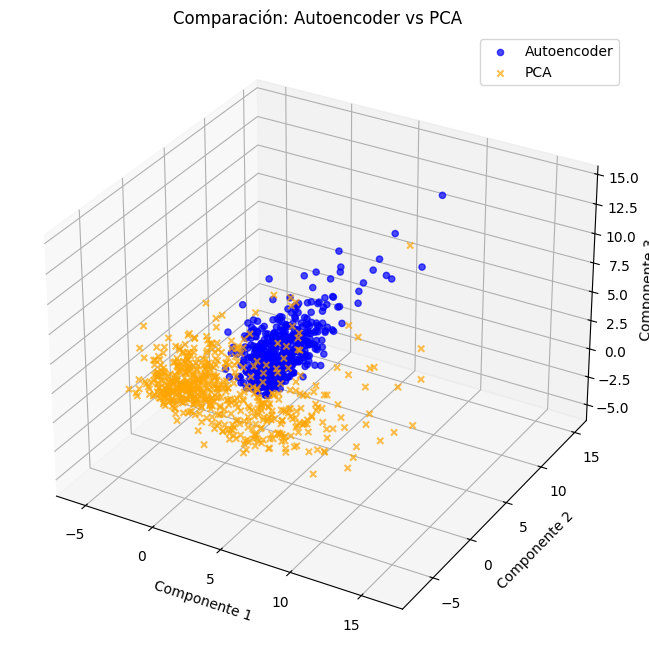

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para gráficos 3D

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar el espacio latente del autoencoder
ax.scatter(
    latent_space[:, 0], latent_space[:, 1], latent_space[:, 2],
    alpha=0.7, label='Autoencoder', color='blue'
)

# Graficar el espacio de los componentes principales del PCA
ax.scatter(
    pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
    alpha=0.7, label='PCA', color='orange', marker='x'
)

# Etiquetas y título
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
ax.set_title("Comparación: Autoencoder vs PCA")

# Mostrar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()



**Conclusión** sobre los rsultados obtenidos:


Los resultados del autoencoder muestran una separación más directa de las características relacionadas con el diagnóstico de cáncer.

En contraste, el PCA genera componentes que maximizan la varianza explicada de forma global, lo que puede dificultar la interpretación en términos de características individuales específicas.

En cuanto a la representación gráfica, el autoencoder podría ser más eficiente en términos de representar la estructura subyacente de los datos, mientras que el PCA se ve limitado a solo captar la varianza lineal.

La mayor dispersión en el PCA y la mayor concentración en el autoencoder podrían reflejar la flexibilidad del autoencoder para ajustarse a relaciones más complejas.

Por otro lado, utilizamos la métrica de reconstrucción del modelo. En este caso los errore son muy similares.

Sin embargo, por lo mencionado anteriorimente, pensamos que es mejor la reducción de la dimensionalidad mediante el espacio latente.